In [1]:
import setup
setup.init_django()
from market import services as market_services
from market import tasks as market_tasks
from market.models import Company
import json
from decouple import config
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

In [2]:
ticker = "AAPL"
name = "Apple"
company, _ = Company.objects.get_or_create(name=name, ticker=ticker)
company.id

2

In [ ]:
market_tasks.sync_historical_stock_data(
    years_ago=1, 
    company_ids=[company.id], 
    use_celery=False, 
    verbose=True
)

# use celery / async
# market_tasks.sync_historical_stock_data.delay(years_ago=5, company_ids=[company.id], use_celery=True, verbose=False)

In [3]:
style.use('ggplot')
days = 690
queryset = market_services.get_daily_stock_quotes_queryset(ticker, days=days)
historical_data_list = queryset.values(
    'time', 'open_price', 'close_price', 'high_price', 'low_price',
    'raw_timestamp', 'number_of_trades', 'volume', 'volume_weighted_average'
)
historical_data = pd.DataFrame.from_records(historical_data_list)
print(historical_data.head())

                       time open_price close_price high_price low_price  \
0 2023-03-06 23:55:00+00:00   153.8300    153.8900   153.9000  153.8300   
1 2023-03-07 23:55:00+00:00   151.6600    151.6400   151.7500  151.6400   
2 2023-03-08 23:55:00+00:00   153.0000    153.0000   153.0000  152.9600   
3 2023-03-09 23:55:00+00:00   150.4000    150.4000   150.4000  150.4000   
4 2023-03-10 23:55:00+00:00   148.5000    148.5100   148.5100  148.5000   

   raw_timestamp  number_of_trades  volume volume_weighted_average  
0  1678146900000                79    3417              153.879800  
1  1678233300000                82    9918              151.722700  
2  1678319700000                29    1958              152.977800  
3  1678406100000                19     333              150.393600  
4  1678492500000                53    3814              148.499400  


In [4]:
historical_data.reset_index(inplace=True)
historical_data.set_index("time", inplace=True)
historical_data = historical_data.drop("index", axis=1)

print(historical_data.head())

                          open_price close_price high_price low_price  \
time                                                                    
2023-03-06 23:55:00+00:00   153.8300    153.8900   153.9000  153.8300   
2023-03-07 23:55:00+00:00   151.6600    151.6400   151.7500  151.6400   
2023-03-08 23:55:00+00:00   153.0000    153.0000   153.0000  152.9600   
2023-03-09 23:55:00+00:00   150.4000    150.4000   150.4000  150.4000   
2023-03-10 23:55:00+00:00   148.5000    148.5100   148.5100  148.5000   

                           raw_timestamp  number_of_trades  volume  \
time                                                                 
2023-03-06 23:55:00+00:00  1678146900000                79    3417   
2023-03-07 23:55:00+00:00  1678233300000                82    9918   
2023-03-08 23:55:00+00:00  1678319700000                29    1958   
2023-03-09 23:55:00+00:00  1678406100000                19     333   
2023-03-10 23:55:00+00:00  1678492500000                53    3814  

In [5]:
historical_data.head()

,open_price,close_price,high_price,low_price,raw_timestamp,number_of_trades,volume,volume_weighted_average
time,,,,,,,,
2023-03-06 23:55:00+00:00,153.8300,153.8900,153.9000,153.8300,1678146900000,79,3417,153.879800
2023-03-07 23:55:00+00:00,151.6600,151.6400,151.7500,151.6400,1678233300000,82,9918,151.722700
2023-03-08 23:55:00+00:00,153.0000,153.0000,153.0000,152.9600,1678319700000,29,1958,152.977800
2023-03-09 23:55:00+00:00,150.4000,150.4000,150.4000,150.4000,1678406100000,19,333,150.393600
2023-03-10 23:55:00+00:00,148.5000,148.5100,148.5100,148.5000,1678492500000,53,3814,148.499400


In [6]:
print(historical_data.dtypes)

open_price                 object
close_price                object
high_price                 object
low_price                  object
raw_timestamp              object
number_of_trades            int64
volume                      int64
volume_weighted_average    object
dtype: object


In [7]:
columns_to_convert = ['open_price', 'close_price', 'high_price', 'low_price', 'volume_weighted_average']
historical_data[columns_to_convert] = historical_data[columns_to_convert].apply(pd.to_numeric)

In [8]:
print(historical_data.dtypes)

open_price                 float64
close_price                float64
high_price                 float64
low_price                  float64
raw_timestamp               object
number_of_trades             int64
volume                       int64
volume_weighted_average    float64
dtype: object


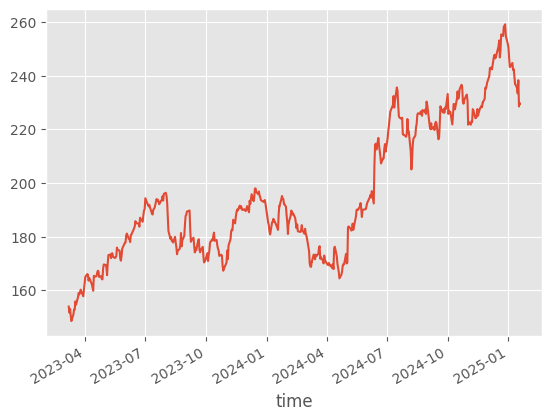

In [9]:
historical_data['close_price'].plot()
plt.show()

In [10]:
historical_data[['high_price','low_price']]

,high_price,low_price
time,,
2023-03-06 23:55:00+00:00,153.90,153.8300
2023-03-07 23:55:00+00:00,151.75,151.6400
2023-03-08 23:55:00+00:00,153.00,152.9600
2023-03-09 23:55:00+00:00,150.40,150.4000
2023-03-10 23:55:00+00:00,148.51,148.5000
...,...,...
2025-01-14 23:55:00+00:00,233.35,233.2900
2025-01-15 23:55:00+00:00,238.44,238.2735
2025-01-16 23:55:00+00:00,228.47,228.3500


In [11]:
historical_data['7ma'] = historical_data['close_price'].rolling(window=7).mean()

In [12]:
historical_data.head()

,open_price,close_price,high_price,low_price,raw_timestamp,number_of_trades,volume,volume_weighted_average,7ma
time,,,,,,,,,
2023-03-06 23:55:00+00:00,153.83,153.89,153.90,153.83,1678146900000,79,3417,153.8798,NaN
2023-03-07 23:55:00+00:00,151.66,151.64,151.75,151.64,1678233300000,82,9918,151.7227,NaN
2023-03-08 23:55:00+00:00,153.00,153.00,153.00,152.96,1678319700000,29,1958,152.9778,NaN
2023-03-09 23:55:00+00:00,150.40,150.40,150.40,150.40,1678406100000,19,333,150.3936,NaN
2023-03-10 23:55:00+00:00,148.50,148.51,148.51,148.50,1678492500000,53,3814,148.4994,NaN


In [13]:
historical_data['7ma'] = historical_data['close_price'].rolling(window=7,min_periods=0).mean()
historical_data.head()

,open_price,close_price,high_price,low_price,raw_timestamp,number_of_trades,volume,volume_weighted_average,7ma
time,,,,,,,,,
2023-03-06 23:55:00+00:00,153.83,153.89,153.90,153.83,1678146900000,79,3417,153.8798,153.890000
2023-03-07 23:55:00+00:00,151.66,151.64,151.75,151.64,1678233300000,82,9918,151.7227,152.765000
2023-03-08 23:55:00+00:00,153.00,153.00,153.00,152.96,1678319700000,29,1958,152.9778,152.843333
2023-03-09 23:55:00+00:00,150.40,150.40,150.40,150.40,1678406100000,19,333,150.3936,152.232500
2023-03-10 23:55:00+00:00,148.50,148.51,148.51,148.50,1678492500000,53,3814,148.4994,151.488000


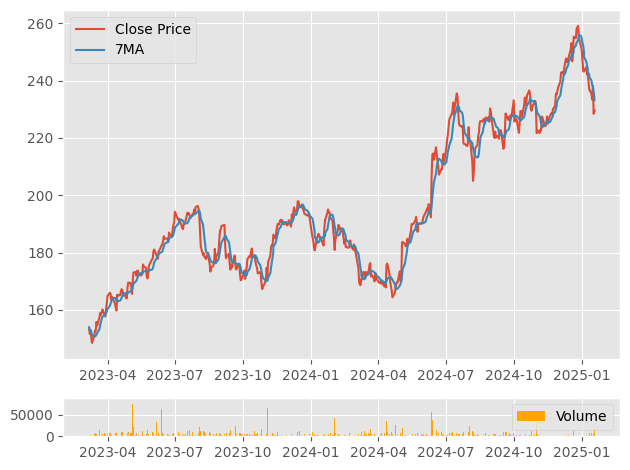

In [14]:
ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(historical_data.index, historical_data['close_price'], label='Close Price')
ax1.plot(historical_data.index, historical_data['7ma'], label='7MA')
ax1.legend()
ax2.bar(historical_data.index, historical_data['volume'], label='Volume', color='orange')
ax2.legend()
plt.tight_layout()  
plt.show()

In [15]:
import mplfinance as mpf
import matplotlib.dates as mdates

In [16]:
historical_data.index = pd.to_datetime(historical_data.index)

In [17]:
df_ohlc = historical_data.resample('10D').agg({
    'open_price': 'first',  
    'high_price': 'max',    
    'low_price': 'min',    
    'close_price': 'last',   
    'volume': 'sum'        
})

In [18]:
df_ohlc.head()

,open_price,high_price,low_price,close_price,volume
time,,,,,
2023-03-06 00:00:00+00:00,153.83,153.9000,148.50,152.70,42699
2023-03-16 00:00:00+00:00,155.82,160.2000,154.59,160.20,56404
2023-03-26 00:00:00+00:00,158.32,166.0200,157.70,165.79,39014
2023-04-05 00:00:00+00:00,163.47,165.3499,159.75,165.00,37027
2023-04-15 00:00:00+00:00,165.20,167.2900,164.92,165.22,30057


In [19]:
df_ohlc = df_ohlc.rename(columns={
    'open_price': 'Open',
    'high_price': 'High',
    'low_price': 'Low',
    'close_price': 'Close',
    'volume': 'Volume'
})

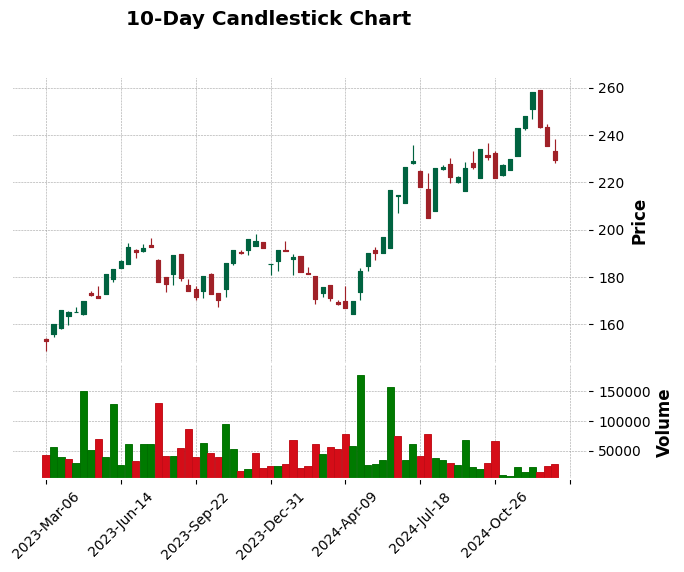

In [20]:
df_ohlc.dropna(inplace=True)

mpf.plot(df_ohlc, type='candle', volume=True, style='charles', title='10-Day Candlestick Chart')